In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clt

from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg
from sklearn.decomposition import PCA

data = np.genfromtxt("MI_timesteps.txt", dtype='int', skip_header=1000)

M = data.shape[0] - 350
matrix = np.zeros((M, 1053))
for i in range(M):
    matrix[i] = data[i:i+351, 1:4].flatten()
    
matrix.shape

(13652, 1053)

In [2]:
pca = PCA(n_components=4)
pc = pca.fit_transform(matrix)
print(pc.shape)

(13652, 4)


C:\Users\lishi\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:900: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\lishi\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:902: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


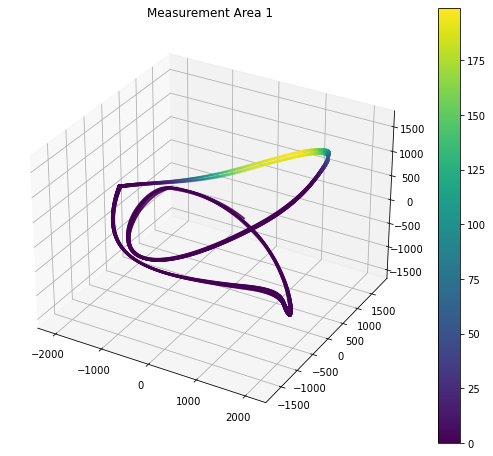

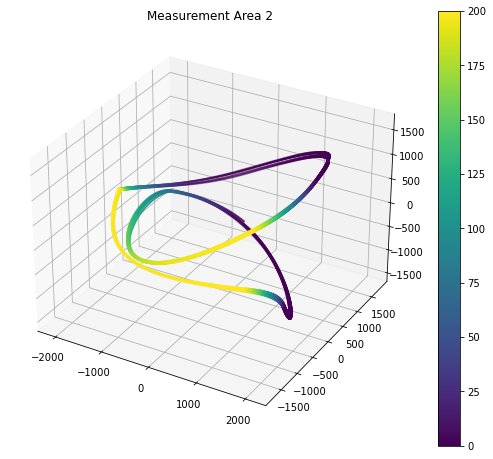

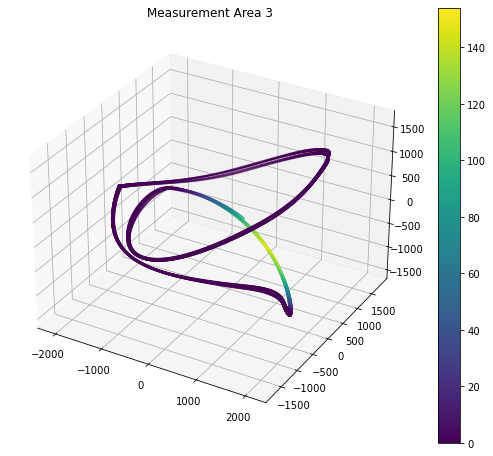

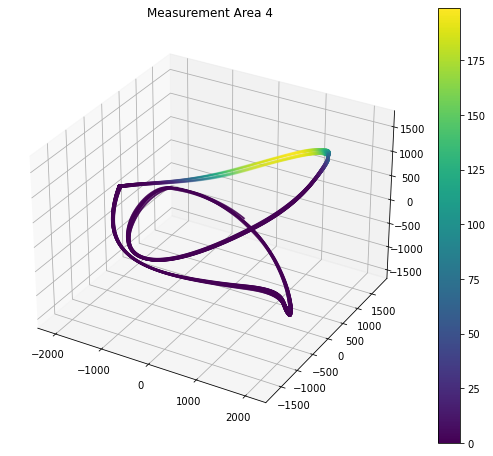

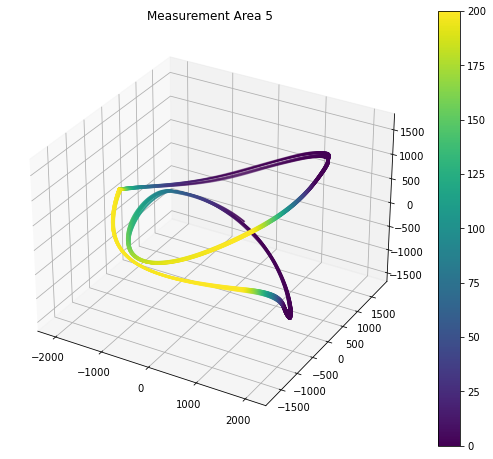

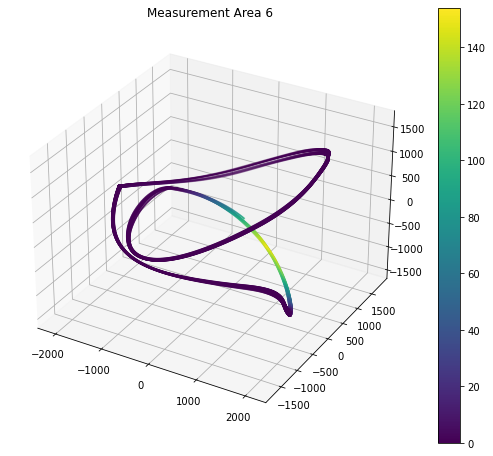

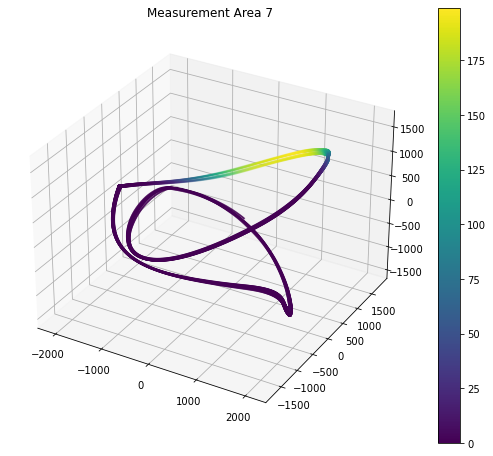

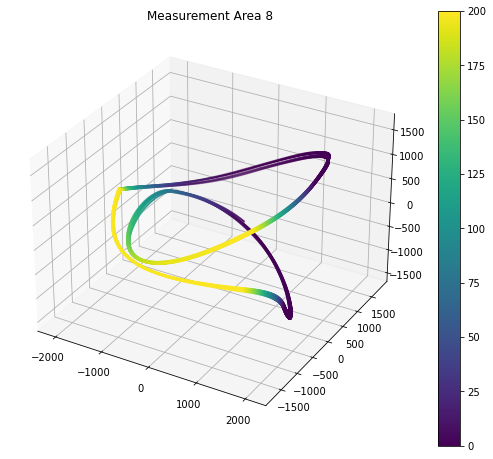

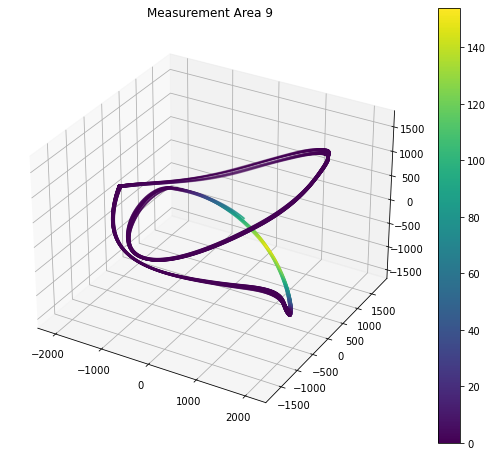

In [3]:
for i in range(9):
    fig = plt.figure(figsize=(20, 8))
    ax0 = fig.add_subplot(1, 2, 1, projection='3d')
    t = ax0.scatter(*pc.T, s=1, c=matrix[:,i])
    plt.colorbar(t)
    plt.title(f"Measurement Area {i+1}")

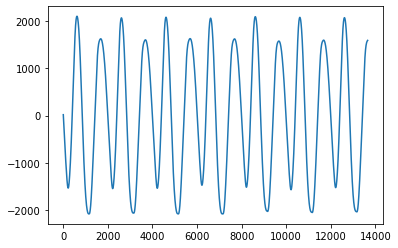

In [5]:
pc0=pc[:,0]
plt.plot(pc0)

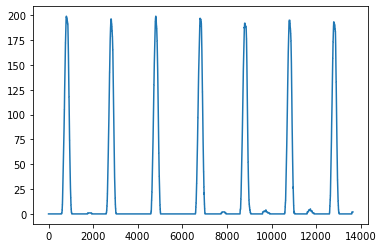

In [6]:
pc1=matrix[:,0]
plt.plot(pc1)

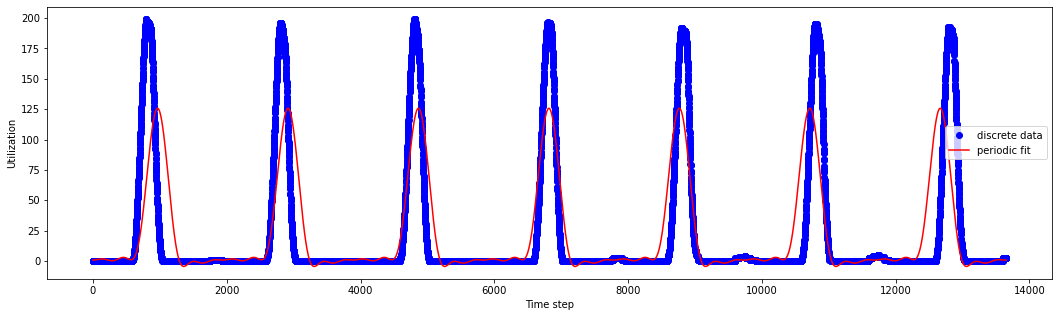

In [7]:
import numpy as np 
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt 
import math as math 
import scipy.special as sp 

alpha = np.linspace(0,len(pc1),len(pc1)) 

omega = 2*7*np.pi/len(pc1) 

def func(alpha, ac1, ac2, ac3, ac4, ac5, ac6, ac7, phi): 
    fit  = ac1+ ac2*np.sin(omega*alpha+phi) + ac3*np.sin(omega*2*alpha+phi) + ac4*np.sin(omega*3*alpha+phi) + ac5*np.sin(omega*4*alpha+phi) +  ac6*np.sin(omega*5*alpha+phi) + ac7*np.sin(omega*6*alpha+phi) 
    return fit 

popt, pcov = curve_fit(func, alpha, pc1) 


y_fit= func(alpha,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6], popt[7]) 
plt.figure(figsize=(18,5))
plt.plot(alpha,pc1,'bo',label='discrete data') 
plt.plot(alpha,y_fit,'r',label='periodic fit') 
plt.xlabel('Time step')
plt.ylabel('Utilization')
plt.legend() 
plt.show() 

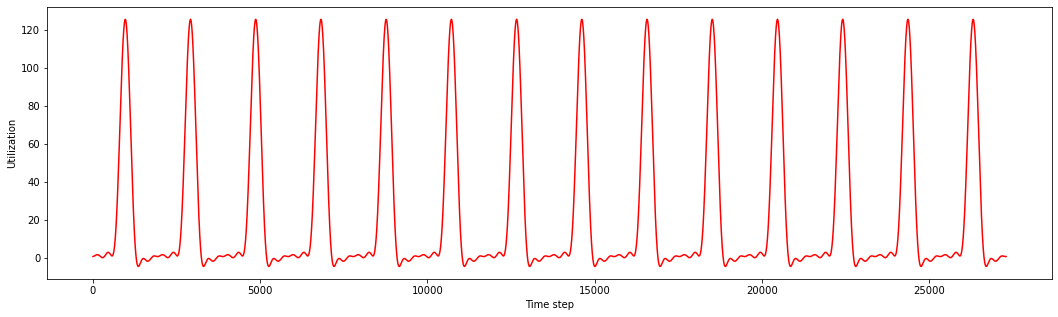

In [8]:
alpha1 = np.linspace(0,2*len(pc1),2*len(pc1)) 
omega1 = 2*7*np.pi/len(pc1)
y_fit1= func(alpha1,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6], popt[7]) 
plt.figure(figsize=(18,5))
plt.plot(alpha1,y_fit1,'r') 
plt.xlabel('Time step')
plt.ylabel('Utilization')
plt.show() 